In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import correlate
import os
import pandas as pd
import tensorflow as tf
import heapq
import time 
arr = np.load("./PEMS04/pems04.npz")
# only contains "data" key.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
arr_pems8 = np.load("./PEMS08/pems08.npz")
pems8_data = arr_pems8["data"]

In [3]:
# arr_1 = np.load("cmp1.npy")


In [4]:
# ordered arguments argument 0 in third entry is detector 0.
pems8_data[:,0,0]

array([133., 114., 140., ..., 120., 102., 102.])

In [5]:
pems04_data = np.load("../ASTGCN-r-pytorch-master/data/PEMS04/PEMS04_r1_d0_w0_astcgn.npz")

In [6]:
list(pems04_data.keys())

['train_x',
 'train_target',
 'train_timestamp',
 'val_x',
 'val_target',
 'val_timestamp',
 'test_x',
 'test_target',
 'test_timestamp',
 'mean',
 'std']

In [7]:
# 307 detectors. 
print(len(pems04_data["test_x"][:,0,0,0]))
print(pems04_data["test_target"][:,0,0])
pems04_data["test_x"][:,0,0,0]



3394
[ 54.  35.  48. ... 112. 123. 118.]


array([-1.21568372, -1.10704201, -1.00479099, ..., -0.26347109,
       -0.1995642 , -0.10370387])

In [8]:
pems04_data["test_x"].shape

(3394, 307, 3, 12)

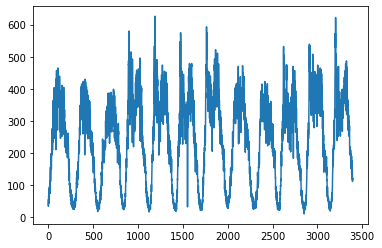

In [9]:

def plt_attr(col_name):
    plt.plot(list(range(len(pems04_data[col_name][:,0,0]))), pems04_data[col_name][:,0,0])
    
# 
plt_attr("test_target")

In [10]:
pems04_data["test_target"][:,0,0]

array([ 54.,  35.,  48., ..., 112., 123., 118.])

In [11]:
def swap(x,y):
    temp = x
    x = y
    y = temp
    return x,y

In [12]:
# 3684 possible sequences of 3394 observations to perturb.
# we may need to use joblib to pseudo-parallelize 
307*12

3684

In [13]:
# per detector, shifted by at most 12 positions.
pems04_data["test_x"][3390:3393, 0, 0:1, 11]

array([[-0.32737798],
       [-0.47436382],
       [-0.60856829]])

In [16]:
first_portion = pems04_data["test_x"][0:12, :, 0:1, :]


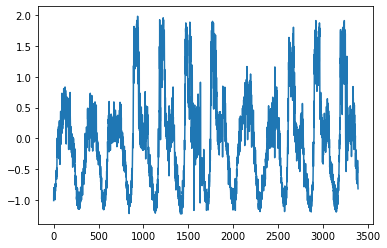

In [17]:
plt.plot(pems04_data["test_x"][:, 1, 0:1, 0])
        
        
        


In [19]:
'''
:brief: sample_similar_segments - prints the .
:param:
:param: ref_portion - 
:param: kwargs - key word arguments
:return: 
'''
def sample_similar_segments(data_vec, jth, ref_portion, **kwargs):
    if ("sample_type" in kwargs):
        if (kwargs["sample_type"] == "mc_sample_strumbelj"):
            mc_sample_strumbelj(data_vec, jth, most_similar_segments(ref_portion[0],ref_portion[1],
                                                                data_vec, 10))
    else:
        print("No specified sample type.")
        return []

def perturb_data_file(data_file_name, jth, ref_portion, data_type, **kwargs):
    if (data_type == np.ndarray):
        assert "data_entry" in kwargs, \
            "Data entry in np.ndarray has no data entry key."
        assert type(data_entry_dict["data_entry"]) == int,\
            "np.ndarray data entry not an integer."
        assert data_file_name.endswith(".npz") or data_file_name.endswith(".npy"),\
                "Specified data file not valid given data type."
        data_vec = np.load(data_file_name)[data_entry_dict["data_entry"]]
        sample_similar_segments(data_vec, jth, ref_portion, kwargs)
    elif (data_type == pd.core.frame.DataFrame):
        assert data_file_name.endswith(".csv"), "File not valid csv."
        assert "feature_perturb" in kwargs,\
            "Feature to perturb in dataframe not a key."
        assert type(data_entry_dict["feature_perturb"]) == str,\
            "pd.DataFrame feature name is not a string."
        df = pd.read_csv(data_file_name)
        data_vec = df[kwargs["feature_perturb"]]
        sample_similar_segments(data_vec, jth, ref_portion, kwargs)
    else:
        raise Exception(f"Data Type Not Yet Supported: {type(data_type)}")

40


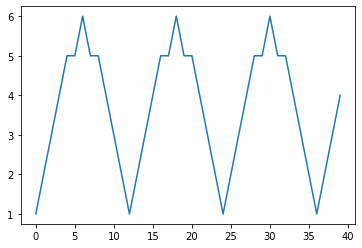

In [20]:
v = [1,2,3,4,5,5,6,5,5,4,3,2,1,2,3,4,5,5,6,5,5,4,3,2,1,2,3,4,5,5,6,5,5,4,3,2,1,2,3,4]
print(len(v))
plt.plot(v)
# mc_sample_strumbelj(v, [[0,7],[13,18],[26,30]])

In [21]:
closest = []
heapq.heapify(closest)
heapq.heappush(closest,(115,"H"))
heapq.heappush(closest,(116,"I"))
heapq.heappush(closest,(117,"J"))
heap_items = list(map(lambda x: x[1], [heapq.heappop(closest) for i in range(len(closest))]))
print(heap_items)

['H', 'I', 'J']


In [22]:
def average(L):
    if len(L) == 0:
        return 0
    return sum(L)/len(L)
def add_on_reciprocal(diff):
    if diff == 0:
        add_on = float('inf')
    else:
        add_on = 1/diff
    return add_on



# Noise Reduction Techniques
def linear_smoother(ts, num_neighbors, weight_method="gaussian"):
    averaged_points = []
    # every 20 points
    points_to_include = []
    for i in range(len(ts)):
        closest = []
        heapq.heapify(closest)
        downward, upward = i, i
        if weight_method == "gaussian":
            under_neighbors = i-num_neighbors
            above_neighbors = i+num_neighbors
            while under_neighbors <= downward and under_neighbors >= 0 and\
                  i+num_neighbors >= upward and above_neighbors < len(ts):
                # sorts by the first element of tuple
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(i-downward),ts[downward]))
                if (len(closest) >= num_neighbors):
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(upward-i), ts[upward]))  
                
                downward -= 1
                upward += 1
            while under_neighbors <= downward and under_neighbors >= 0:
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(i-downward),ts[downward]))
                downward -= 1           
            while i+num_neighbors >= upward and above_neighbors < len(ts):
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(upward-i), ts[upward]))   
                upward += 1
            heap_items = list(map(lambda x: x[1], [heapq.heappop(closest) \
                                                       for i in range(len(closest))]))
            avg = average(heap_items)
            averaged_points.append(avg)
            # we collect twice as many points as total/num_neighbors
            if (i%(num_neighbors//2) == 0):
                points_to_include.append(avg)
        else:
            # rather than a weighted average of nearest data points, 
            # we take ordinary average.
            pass
    return averaged_points, points_to_include


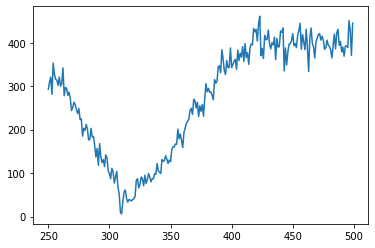

In [23]:
plt.plot(range(250,500),
    pems8_data[250:500,0,0])

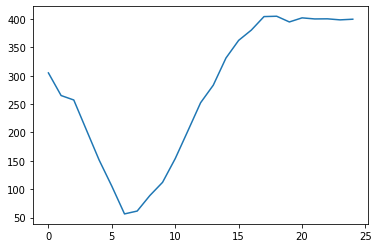

In [24]:
averaged_points, points_to_include = linear_smoother(pems8_data[250:500,0,0],20, "gaussian")
plt.plot(range(len(points_to_include)),points_to_include)

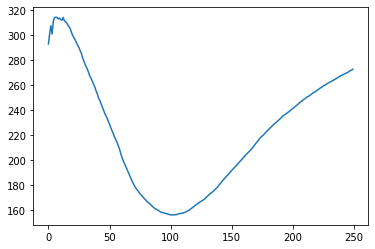

In [25]:
data = pd.Series(pems8_data[250:500,0,0])
windows = data.expanding()
moving_averages = windows.mean()
plt.plot(moving_averages)

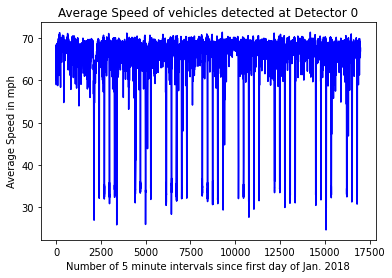

In [26]:
# Third entry in the 3D array contains average speed - every 5 minutes between observations.
# In major metropolitan areas of California.
# 307 detectors
detector = 0
avg_speed_pems4 = plt.plot(list(range(len(arr['data'][:,0]))),arr['data'][:,detector,2], color="blue")
pems4_speed_title = plt.title("Average Speed of vehicles detected at Detector {}".format(detector))
pems4_speed_x = plt.xlabel("Number of 5 minute intervals since first day of Jan. 2018")
pems4_speed_y = plt.ylabel("Average Speed in mph")

(array([1.4777e+04, 1.6500e+03, 3.7800e+02, 1.2200e+02, 4.4000e+01,
        5.0000e+00, 8.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([5.33425414e+10, 1.02006068e+30, 2.04012136e+30, 3.06018204e+30,
        4.08024273e+30, 5.10030341e+30, 6.12036409e+30, 7.14042477e+30,
        8.16048545e+30, 9.18054613e+30, 1.02006068e+31]),
 <BarContainer object of 10 artists>)

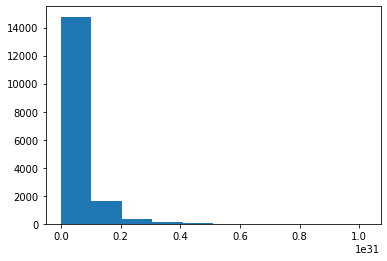

In [27]:
plt.hist(np.exp(arr['data'][:,detector,2]))

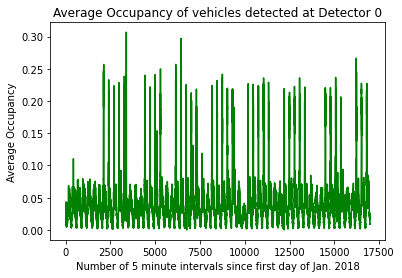

In [28]:
# Second entry - occupancy - fraction of time a vehicle is over a detector.
detector = 0
pems4_occupancy_title = plt.title("Average Occupancy of vehicles detected at Detector {}".format(detector))
pems4_occupancy_x = plt.xlabel("Number of 5 minute intervals since first day of Jan. 2018")
pems4_occupancy_y = plt.ylabel("Average Occupancy")
pems4_occupancy = plt.plot(list(range(len(arr['data'][:,0]))),arr['data'][:,detector,1], color="green")

(array([7.353e+03, 7.872e+03, 8.710e+02, 7.800e+01, 1.340e+02, 2.820e+02,
        2.900e+02, 9.100e+01, 1.800e+01, 3.000e+00]),
 array([0.     , 0.03067, 0.06134, 0.09201, 0.12268, 0.15335, 0.18402,
        0.21469, 0.24536, 0.27603, 0.3067 ]),
 <BarContainer object of 10 artists>)

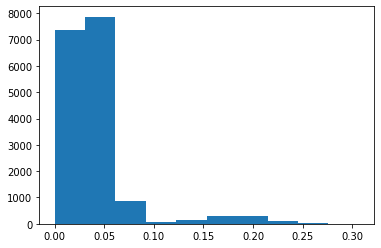

In [29]:
plt.hist(arr['data'][:,detector,1])

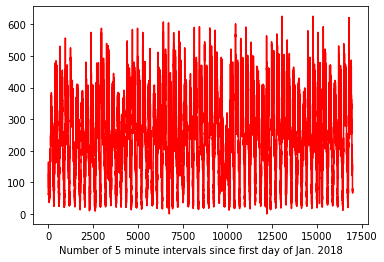

In [30]:
# First entry - flow - number of vehicles passing over the detector in 30 second period.

pems4_flow = plt.plot(list(range(len(arr['data'][:,0]))),arr['data'][:,0,0],color="red")
pems4_flow_x = plt.xlabel("Number of 5 minute intervals since first day of Jan. 2018")
pems4_flow_y = plt.ylabel("")

-1.7761501100187818e-12


(array([2.000e+00, 0.000e+00, 0.000e+00, 2.600e+01, 1.225e+03, 2.013e+03,
        1.626e+03, 3.384e+03, 7.002e+03, 1.714e+03]),
 array([0.        , 0.50019988, 1.00039976, 1.50059964, 2.00079952,
        2.5009994 , 3.00119928, 3.50139916, 4.00159904, 4.50179892,
        5.0019988 ]),
 <BarContainer object of 10 artists>)

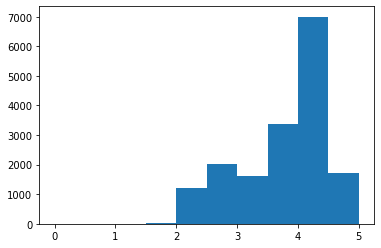

In [31]:
print(average((arr['data'][:,0,0])**(1/3)-5.94739396423))
plt.hist((arr['data'][:,0,0])**(1/4))

In [32]:
# we want the distributions of the features to be nearly 
# normal. We're using ks test to ascertain this ~N(0,1).
from scipy import stats
stats.kstest((arr['data'][:,0,0])**(1/3)-5.94739396423, 'norm')

KstestResult(statistic=0.18832315012206158, pvalue=0.0)

In [33]:
A414df = pd.read_csv("A414.csv")

In [34]:
def rows_to_keep_no_dups(df, var):
    rows_keep = []
    prev = None
    for i in range(len(df)):
        if not prev or (df.iloc[i][var] != prev):
            # either the first row or distinct value.
            rows_keep.append(i)
        prev = df.iloc[i][var]
    return rows_keep
    

In [35]:
start = time.time()
no_dups = A414df.iloc[rows_to_keep_no_dups(A414df, "AverageJT")]
no_dups = no_dups.iloc[rows_to_keep_no_dups(no_dups,"AverageSpeed")]
no_dups = no_dups.iloc[rows_to_keep_no_dups(no_dups,"Flow")]
end = time.time()
print(f"No dup rows time: {end-start}")

No dup rows time: 25.533222913742065


In [37]:
var_jnt = np.array(no_dups["AverageJT"])
norm_jnt = (var_jnt-var_jnt.min())/(var_jnt.max()-var_jnt.min())
var_flw = np.array(no_dups["Flow"])
norm_flw = (var_flw-var_flw.min())/(var_flw.max()-var_flw.min())
var_spd = np.array(no_dups["AverageSpeed"])
norm_spd = (var_spd-var_spd.mean())/(var_spd.max()-var_spd.min())
print(norm_jnt,norm_flw,norm_spd)

[0.04118009 0.04615797 0.03403579 ... 0.03391409 0.04148436 0.03432789] [0.03308131 0.04126975 0.0494582  ... 0.12724841 0.10404782 0.08494145] [-0.04014911 -0.06969203  0.00791233 ...  0.00877942 -0.04200716
  0.00580654]


In [168]:
def max_min_normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [173]:
no_dup_train.loc[:,["AverageJT","AverageSpeed","Flow"]]

,AverageJT,AverageSpeed,Flow
0,0.041180,0.560077,0.033081
3,0.046158,0.530534,0.041270
4,0.034036,0.608138,0.049458
5,0.041180,0.560077,0.043999
15,0.050004,0.509538,0.012610
...,...,...,...
34868,0.018871,0.739812,0.127248
34869,0.042677,0.550910,0.113601
34870,0.042714,0.550663,0.095532
34871,0.032624,0.618543,0.098425


In [176]:
max_min_normalize(no_dup_train["Flow"])

0        0.033081
3        0.041270
4        0.049458
5        0.043999
15       0.012610
           ...   
34868    0.127248
34869    0.113601
34870    0.095532
34871    0.098425
34872    0.077954
Name: Flow, Length: 25327, dtype: float64

In [137]:
split_date = pd.to_datetime("2/1/14 0:00")
no_dup_train = no_dups[pd.to_datetime(no_dups["Date"]) < split_date]
no_dup_test = no_dups[pd.to_datetime(no_dups["Date"]) >= split_date]

Timestamp('2014-02-01 00:00:00')

In [197]:
# Data Windowing
'''
:param: n_past - 
:param: n_future - 
:return: 2-tuple of the training sets for x and y.
'''
def produce_x_y(n_trained, n_tested, df,_vars,target_var):
    x, y = [],[]
    for i in range(n_trained, len(df)-n_tested):
        x.append(np.array(df[_vars])[i-n_trained:i,:])
        y.append(np.array(df[target_var])[i:i+n_tested])
    return np.array(x), np.array(y)
def make_train_data_windows(n_trained, n_tested, df_train, df_test, _vars, target_var):
    for var in _vars:
        train_max_val = df_train[var].max()
        train_min_val = df_train[var].min()
        test_max_val = df_test[var].max()
        test_min_val = df_test[var].min()
        df_train.loc[:,var] = (df_train.loc[:,var]-train_min_val)/(train_max_val-train_min_val)
        df_test.loc[:,var] = (df_test.loc[:,var]-test_min_val)/(test_max_val-test_min_val)
    x_train, y_train = produce_x_y(n_trained, n_tested, df_train,_vars, target_var)
    x_val, y_val = produce_x_y(n_trained, n_tested, df_test,_vars, target_var)
    return x_train, y_train, x_val, y_val
#     x_train, y_train = [],[]
#     for i in range(n_trained, len(df)-n_tested):
#         x_train.append(np.array(df[_vars])[i-n_trained:i,:])
#         y_train.append(np.array(df[target_var])[i:i+n_tested])
#     return np.array(x_train), np.array(y_train)

In [198]:
x_train, y_train, x_val, y_val = make_train_data_windows(128, 32, no_dup_train, no_dup_test,
                                           ["AverageJT","AverageSpeed","Flow"], "Flow")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [199]:
# supposed to be sequence of layers for one modality.
# with 3 features per timestamp, input shape would be None, 3
# n_future, n_past would need to be determined.
def make_cnn_gru(units, n_obs, n_features):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=1,activation='relu', input_shape=(n_obs,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=32, kernel_size=1,activation='relu', input_shape=(n_obs,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=32, kernel_size=1,activation='relu', input_shape=(n_obs,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.3))
    model.add(Dense(n_features,activation="relu"))
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=n_obs))
    model.add(Dropout(0.3))
    model.add(Dense(units=32))
    model.compile(optimizer="adam",loss="mse",
                 metrics=[keras.metrics.mean_squared_error])
    return model


In [200]:
# traffic flow
import keras
from keras.layers import Input, Embedding, GRU, MaxPooling1D, GlobalMaxPool1D, CuDNNGRU
from keras.layers import Dropout, Dense, Activation, Flatten, Conv1D,BatchNormalization
from keras.models import Sequential
model = make_cnn_gru(64, len(x_train[0]), 3)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_62 (Conv1D)           (None, 128, 32)           128       
_________________________________________________________________
batch_normalization_118 (Bat (None, 128, 32)           128       
_________________________________________________________________
max_pooling1d_68 (MaxPooling (None, 128, 32)           0         
_________________________________________________________________
dropout_137 (Dropout)        (None, 128, 32)           0         
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 128, 32)           1056      
_________________________________________________________________
batch_normalization_119 (Bat (None, 128, 32)           128       
_________________________________________________________________
max_pooling1d_69 (MaxPooling (None, 128, 32)           0         
__________

In [201]:
# will stop when there's no improvement in loss for 3 epochs - Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)
checkpoint = tf.keras.callbacks.ModelCheckpoint('model_best_weights.h5',
                                                monitor='val_loss',
                                                save_best_only=True,
                                                mode="min")
fitted_model1 = model.fit(x_train,
                          np.reshape(y_train,(y_train.shape[0],
                                              1,
                                             y_train.shape[1])),
                          epochs = 100, 
                          validation_split=0.2,
                          callbacks=[callback,checkpoint],
                          batch_size = 512)


Train on 20133 samples, validate on 5034 samples
Epoch 1/100
20133/20133 [==============================] - 54s 3ms/step - loss: 1.8392 - mean_squared_error: 1.8392 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 2/100
20133/20133 [==============================] - 44s 2ms/step - loss: 0.4998 - mean_squared_error: 0.4998 - val_loss: 0.0753 - val_mean_squared_error: 0.0753
Epoch 3/100
20133/20133 [==============================] - 47s 2ms/step - loss: 0.3363 - mean_squared_error: 0.3363 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 4/100
20133/20133 [==============================] - 44s 2ms/step - loss: 0.2228 - mean_squared_error: 0.2228 - val_loss: 0.0927 - val_mean_squared_error: 0.0927
Epoch 5/100
20133/20133 [==============================] - 43s 2ms/step - loss: 0.1420 - mean_squared_error: 0.1420 - val_loss: 0.0878 - val_mean_squared_error: 0.0878
Epoch 6/100
20133/20133 [==============================] - 43s 2ms/step - loss: 0.0998 - mean_squared_error: 0.

20133/20133 [==============================] - 42s 2ms/step - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 50/100
20133/20133 [==============================] - 42s 2ms/step - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.0570 - val_mean_squared_error: 0.0570
Epoch 51/100
20133/20133 [==============================] - 43s 2ms/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 52/100
20133/20133 [==============================] - 43s 2ms/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.0571 - val_mean_squared_error: 0.0571
Epoch 53/100
20133/20133 [==============================] - 44s 2ms/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0597 - val_mean_squared_error: 0.0597
Epoch 54/100
20133/20133 [==============================] - 43s 2ms/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.0607 - val_mean_squared_error: 0.0607

20133/20133 [==============================] - 42s 2ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 98/100
20133/20133 [==============================] - 42s 2ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 99/100
20133/20133 [==============================] - 42s 2ms/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 100/100
20133/20133 [==============================] - 43s 2ms/step - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


In [208]:
saved_model = tf.keras.models.load_model("./model_best_weights.h5")
saved_model.evaluate(x_val, y_val, batch_size=512)

1883/1883 [==============================] - 2s 1ms/sample - loss: 0.1049 - mean_squared_error: 0.1043


[0.10490765881962556, 0.104251236]

In [209]:
n_trained,n_tested=128,32
timestamps_i = []
for i in range(n_trained, len(no_dup_test)-n_tested):
    timestamps_i += list(range(i,i+n_tested))

In [210]:
y_val_predictions = saved_model.predict(x_val, batch_size=512)

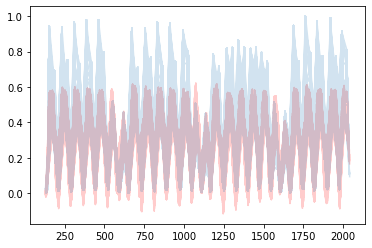

In [212]:
plt.plot(timestamps_i,np.reshape(y_val_predictions, (60256,)),alpha=0.2,color="red")
plt.plot(timestamps_i,np.reshape(y_val, (60256,)),alpha=0.2)

In [9]:
def ma(ts,window):
    ts_points = []
    for i in range(window,len(ts)):
        ts_points.append(np.sum(ts[(i-window):i])/window)
    return ts_points

def norm(vec):
    return np.sqrt(np.sum([x**2 for x in vec]))

def cosine_sim(vec1,vec2):
    return np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))

def deltas(vec):
    diffs = []
    for i in range(1,len(vec)):
        diffs.append(vec[i]-vec[i-1])
    return diffs
# cosine similarity between pairwise difference vectors (x_i-x_{i-1})
def most_similar_segments(start_idx,end_idx,ts,k,compute_diff=True,avg_diff=False):
    cmp_window = ts[start_idx:end_idx]
    if compute_diff:
        cmp_window = deltas(cmp_window)
    window_size = end_idx-start_idx
    L = []
    heapq.heapify(L)
    num_segments = 0
    sim_to_region = dict()
    seen_segments = []
    for i in range(window_size,len(ts)):
        segment = ts[(i-window_size):i]
        if compute_diff:
            segment = deltas(segment)
        if avg_diff:
            sim = np.sum(np.array(cmp_window)-np.array(segment))/len(cmp_window)
        else:
            sim = correlate(cmp_window,segment)[0]
            #sim = cosine_sim(cmp_window,segment)
        sim = round(sim,6)
        if sim == -68774.0:
            print("Sim Negative",i,num_segments)
#         if i-window_size in set([2510,2259,2008,1757,1506,
#                                 1255,1004,753,502,0]):
#                 print(i-window_size,sim)
#         else:
#                 print("LOWER?:",i-window_size,sim)
        if len(seen_segments) != 0:
            if seen_segments[-1][-1] >= i-window_size:
                continue
        if num_segments < k:
            sim_to_region[sim] = list(range(i-window_size,i))
            heapq.heappush(L,sim)
            num_segments += 1
        else:
            least_sim_largest_dist = heapq.nsmallest(1,L)[0]
#             print("Keeping size:",len(L))
#             print("least_similar",least_sim_largest_dist)
            if sim >= least_sim_largest_dist: # number of segments exceeds k
#                 sim_to_region[sim] = list(range(i-window_size,i))
                # need to remove the least similar region if similarity is greater than 
                # the least similar one in the heap.
                sim_to_region[sim] = list(range(i-window_size,i))
                heapq.heappush(L,sim)
                del sim_to_region[least_sim_largest_dist]
                # here we pop the smallest element from L.
                heapq.heappop(L)
        seen_segments.append([i-window_size,i])
    print(sim_to_region.keys())
    return list(sim_to_region.values())

In [10]:
# implement basic algorithm from thesis writeup.
def find_greatest_change(data,chunk_sizes):
    start_times = []
    for size in chunk_sizes:
        max_change = 0

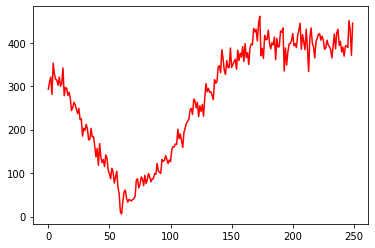

In [11]:
# list(pems8_data[:,0,2])[250:375]
plt.plot(list(range(250)),pems8_data[250:500,0,0],color="red")

In [12]:
sim_segs = most_similar_segments(250,500, list(pems8_data[:,0,0]),20)

Sim Negative 501 1
dict_keys([15556.0, 20213.0, 9955.0, 15888.0, 25873.0, 14238.0, 12696.0, 11572.0, 16725.0, 7422.0, 21580.0, 12177.0, 14460.0, 31210.0, 22550.0, 10583.0, 37514.0, 40820.0, 9352.0, 9022.0])


In [13]:
# PEMS08 average speeds
def plot_similar_cyclic_regions(indices, ts):
    indices = sorted(indices, key=lambda x: x[0])
    lsts_idx_excluded = []
    curr_end = None
    plt.plot(list(range(250)),pems8_data[250:500,0,0],color="yellow")
    plt.figure(figsize=(3, 3))
    # we assume non-overlapping indices
    for i,index_lst in enumerate(indices):
        plt.plot(index_lst,ts[index_lst],color="purple")
        if i == len(indices)-1:
            indices_to_end = list(range(index_lst[-1],len(ts)))
            plt.plot(indices_to_end,
                     ts[indices_to_end],
                    color="cyan")
        else:
            indices_in_between = list(range(index_lst[-1],indices[i+1][0]))
            plt.plot(indices_in_between,
                     ts[indices_in_between],
                    color="cyan")
        if i == 0 and index_lst[0] > 0:
            plt.plot(list(range(0,index_lst[0])),ts[:index_lst[0]],color="green")
        plt.figure(figsize=(3, 3))
    plt.show()
# cyan is data in the time series that aren't part of the most similar regions.
# 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


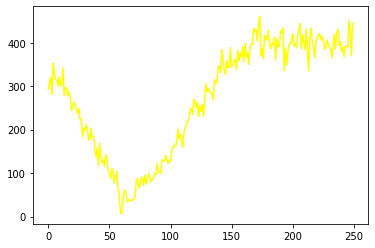

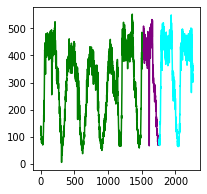

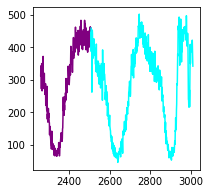

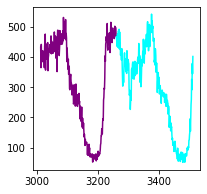

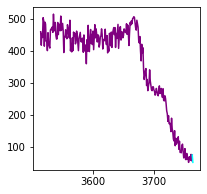

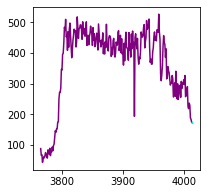

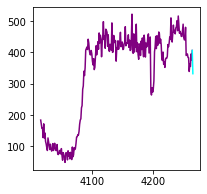

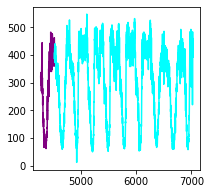

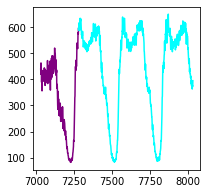

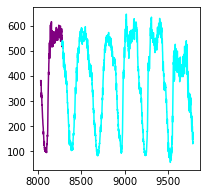

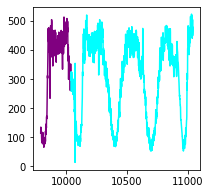

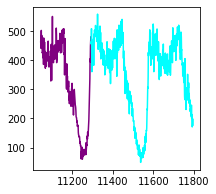

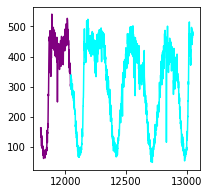

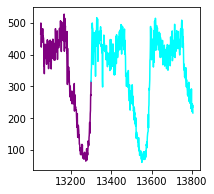

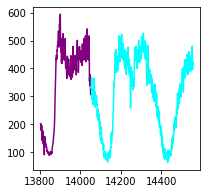

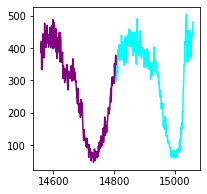

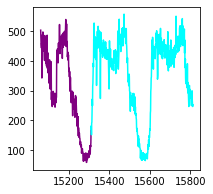

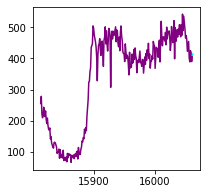

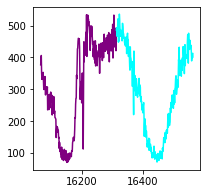

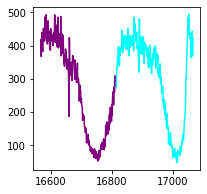

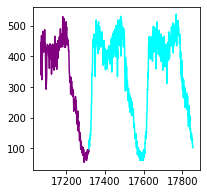

<Figure size 216x216 with 0 Axes>

In [14]:
plot_similar_cyclic_regions(sim_segs,pems8_data[:,0,0])

In [12]:
sim_segs_all = [[idx for idx in seg] for seg in sim_segs]

In [13]:
sim_segs_idx = [idx for seg in sim_segs for idx in seg]

In [14]:
print(len(set(pems8_data[sim_segs_idx,0,0])))
print(len(pems8_data[sim_segs_idx,0,0]))

496
5000


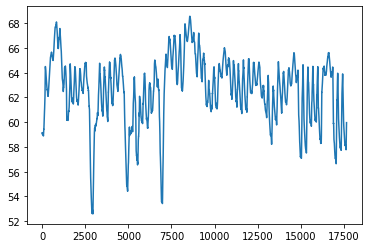

In [61]:
pems8_ma = ma(pems8_data[:,0,2],200)
plt.plot(list(range(len(pems8_ma))),pems8_ma)

In [ ]:
incomplete_highways_england_data = pd.read_csv("../")

In [52]:
predictions_ASTGCN = np.load('output_epoch_65_test.npz')

In [53]:
# Keys within the predictions output
for key in predictions_ASTGCN.keys():
    print(key)

input
prediction
data_target_tensor


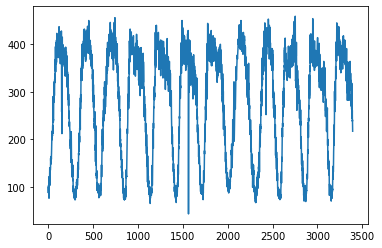

In [63]:
detector = 5
plt.plot(predictions_ASTGCN["input"][:,detector,0,1])

In [56]:
# prediction window is over 1 hour in the future .

In [92]:
predictions_ASTGCN["input"][:,detector,0,11]

array([ 53.99999668,  53.99999668,  34.99999075, ..., 132.99999801,
       111.99999612, 122.99999955])

In [80]:
predictions_ASTGCN["input"][:,detector,0,7]

array([ 52.99999637,  49.99999543,  43.99999356, ..., 145.00000175,
       156.00000052, 137.99999957])

In [69]:
predictions_ASTGCN["data_target_tensor"][:,detector,0]

array([ 54.,  35.,  48., ..., 112., 123., 118.], dtype=float32)

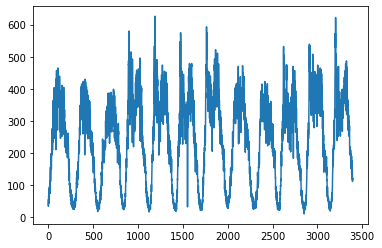

In [68]:
plt.plot(predictions_ASTGCN["data_target_tensor"][:,detector,0])

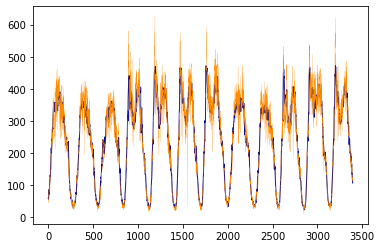

In [56]:
detector = 0
predicted_ts = predictions_ASTGCN["prediction"][:,detector,2]
plt.plot(list(range(len(predicted_ts))),predicted_ts,
         linewidth=1, color="darkblue",label="predicted")
true_ts = predictions_ASTGCN["data_target_tensor"][:,detector,2]
plt.plot(list(range(len(true_ts))),true_ts,
         linewidth=0.2,color="darkorange")



In [97]:
# 12 - forecasted target is the traffic flow.
print(predictions_ASTGCN["prediction"][:,detector,2])
predictions_ASTGCN["input"][:,detector,0,2]

[ 60.279232  61.571598  56.867813 ... 120.79352  111.26196  107.287994]


array([ 49.99999543,  56.99999762,  39.99999231, ..., 190.99999978,
       149.99999865, 120.99999893])

In [33]:
def pairwise_diff(vec1,vec2):
    assert type(vec1) == type(vec2) and type(vec1) == np.ndarray
    return vec1-vec2

In [37]:
diffs = pairwise_diff(np.array(true_ts),np.array(predicted_ts))

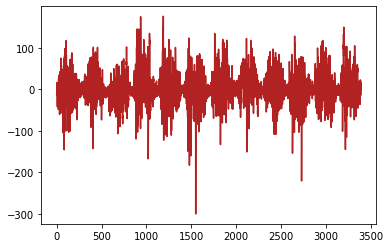

In [39]:
plt.plot(list(range(len(diffs))),diffs,color="firebrick")